In [1]:
# G Oldford Jan 17 2023

# visualize monte carlo results from ecosim Monte Carlo
# uses ggplot2
#
# https://erdavenport.github.io/R-ecology-lesson/05-visualization-ggplot2.html

ERROR: Error in parse(text = x, srcfile = src): <text>:1:22: unexpected symbol
1: Analysis - Visualize Monte
                         ^


In [2]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.4
v tibble  2.1.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [92]:
# read data and pivot so all runs in one col
# I can't find Biomass in the auto written MC run out files, so I'm saving from the plot in the MC plugin
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//Results//Scenario3_MC//"
file = "BiomassPlotSave_Scen3a_NoTKWForce.csv"
header_lines = 1
results_df <- read.csv(paste(path, file,sep=""), skip = header_lines)

n_MC_runs = 100 # determines columns to grab (first cols assumed to be seals)

# rename 'data' col to Year
results_trim = results_df %>% rename(year = Data) %>% 
               select(c(0:n_MC_runs))

head(results_trim)

year,X2..Seals,X2..Seals.1,X2..Seals.2,X2..Seals.3,X2..Seals.4,X2..Seals.5,X2..Seals.6,X2..Seals.7,X2..Seals.8,...,X2..Seals.89,X2..Seals.90,X2..Seals.91,X2..Seals.92,X2..Seals.93,X2..Seals.94,X2..Seals.95,X2..Seals.96,X2..Seals.97,X2..Seals.98
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1950.083,1.000288,1.000274,1.000304,1.000287,1.000295,1.000283,1.000251,1.000314,1.000299,...,1.000281,1.000284,1.000329,1.000317,1.000319,1.000311,1.000298,1.000321,1.000277,1.000281
1950.167,1.000576,1.000546,1.000606,1.000572,1.000589,1.000564,1.000500,1.000627,1.000595,...,1.000559,1.000568,1.000657,1.000633,1.000636,1.000620,1.000593,1.000641,1.000552,1.000560
1950.250,1.000864,1.000820,1.000911,1.000859,1.000884,1.000846,1.000749,1.000941,1.000893,...,1.000839,1.000852,1.000987,1.000950,1.000955,1.000931,1.000890,1.000962,1.000829,1.000841
1950.333,1.001154,1.001094,1.001216,1.001146,1.001180,1.001129,1.001000,1.001257,1.001192,...,1.001119,1.001137,1.001319,1.001269,1.001275,1.001243,1.001189,1.001284,1.001106,1.001123
1950.417,1.001445,1.001369,1.001522,1.001435,1.001477,1.001412,1.001250,1.001574,1.001492,...,1.001400,1.001423,1.001652,1.001589,1.001595,1.001557,1.001487,1.001608,1.001384,1.001406


In [112]:
library(matrixStats)


Attaching package: 'matrixStats'

The following object is masked from 'package:dplyr':

    count



In [181]:
# for geom_ribbon plots get upper and lower bound 
columns <- c(2:n_MC_runs)

results_trim2 = results_trim %>% 
  mutate(Mean= rowMeans(.[columns]), 
         logMean = rowMeans(log(.[columns])),
         stdev=rowSds(as.matrix(.[columns])), 
         stdev_log=rowSds(as.matrix(log(.[columns])))) %>%
  mutate(upper_B = Mean + (1.96 * stdev / sqrt(n_MC_runs)), # 95% confidence interv https://www.mathsisfun.com/data/confidence-interval.html
        lower_B = Mean - (1.96 * stdev / sqrt(n_MC_runs))) %>%
  mutate(year_int = round(year,0)) %>%
  filter(year_int < 2022) %>% #deals with weird super-large year at end of TS data
  select(c("year_int","Mean", "stdev", "lower_B","upper_B")) %>%
  mutate(source = "EwE") %>%
  rename(year = year_int) %>%
  # at this point there are 12 vals per year but these appear to jump every year
  # below will average the stats across each year
  group_by(year) %>% dplyr::summarize(mean_yr = mean(Mean, na.rm=TRUE), 
                                      mean_std = mean(stdev, na.rm=TRUE), 
                                      mean_lwrB = mean(lower_B, na.rm=TRUE),
                                      mean_uppB = mean(upper_B, na.rm=TRUE))


  #mutate(upper_B = exp(upper_logB), 
  #       lower_B = exp(lower_logB)) 



# pivot wide to long
#results_piv = results_trim2 %>% pivot_longer(
#   cols = starts_with("X2"),
#   names_to = "Seals",
#   names_prefix = "",
#   values_to = "B",
#   values_drop_na = TRUE
# )

(results_trim2)

`summarise()` ungrouping output (override with `.groups` argument)


year,mean_yr,mean_std,mean_lwrB,mean_uppB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950,1.0008723,7.573839e-05,1.0008574,1.0008871
1951,1.0036859,3.347852e-04,1.0036203,1.0037515
1952,1.0039962,5.248701e-04,1.0038934,1.0040991
1953,0.9802045,1.598925e-03,0.9798911,0.9805178
1954,0.9504668,4.516407e-03,0.9495816,0.9513520
1955,0.8968399,1.011665e-02,0.8948570,0.8988228
1956,0.8476395,1.638570e-02,0.8444279,0.8508511
1957,0.8074330,2.287959e-02,0.8029486,0.8119174
1958,0.7529064,3.151022e-02,0.7467304,0.7590824


In [182]:
# read seal time series data
# convert from abs to rel to match MC out
path = "C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//UTL_model//6_MRM_SealTKWJuveSlmn//"
file = "SealTKW_timeseries_Scen1_NoTKWForcing.csv"
header_lines = 3
sealobs_df <- read.csv(paste(path, file,sep=""), skip = header_lines)
relB_base = sealobs_df$BiomassAbs[1]
sealobs_df$SealsObsRelB = sealobs_df$BiomassAbs / relB_base
seals_obs_relB = sealobs_df %>% rename(year = Type) %>% 
               select(c("year","SealsObsRelB")) %>%
               mutate(source = "surveys")

head(seals_obs_relB)

year,SealsObsRelB,source
<int>,<dbl>,<chr>
1950,1.0000000,surveys
1951,0.9900000,surveys
1952,0.9801002,surveys
1953,0.9702992,surveys
1954,0.9605959,surveys
1955,0.9509903,surveys


In [165]:
# merge two tables
model_obs_binding = bind_rows(results_trim2,seals_obs_relB)

head(model_obs_binding)

year,Mean,stdev,lower_B,upper_B,source,SealsObsRelB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1950,1.000000,0.000000e+00,1.000000,1.000000,EwE,NA
1950,1.000291,2.488729e-05,1.000290,1.000291,EwE,NA
1950,1.000580,4.987114e-05,1.000579,1.000581,EwE,NA
1950,1.000870,7.513160e-05,1.000869,1.000872,EwE,NA
1950,1.001162,1.007157e-04,1.001160,1.001164,EwE,NA
1950,1.001455,1.266345e-04,1.001452,1.001457,EwE,NA


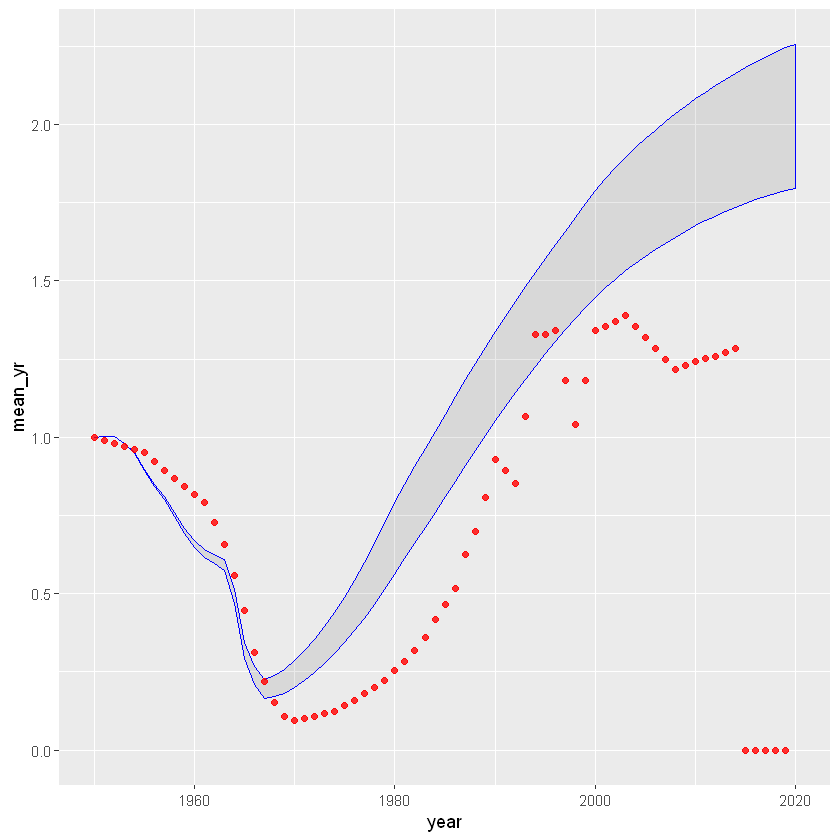

In [183]:
ggplot(data = results_trim2, aes(x = year, y = mean_yr)) +
    geom_ribbon(aes(ymin=mean_lwrB, ymax=mean_uppB),alpha = 0.1, color = "blue") +
    geom_point(data = seals_obs_relB, aes(y=SealsObsRelB, x=year),alpha = 0.8, color = "red")

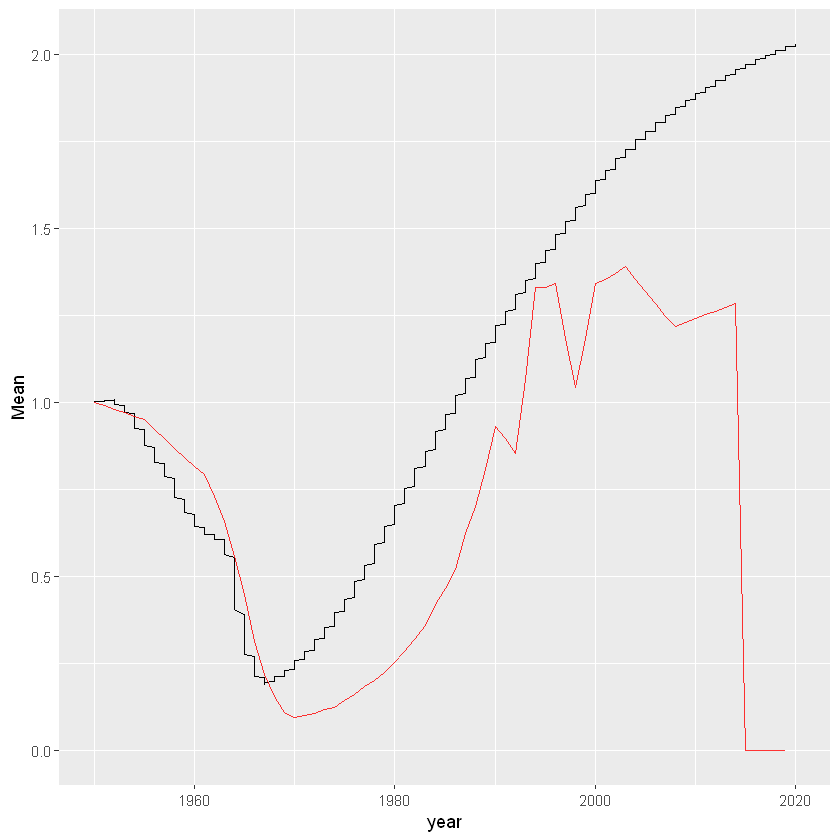

In [168]:
ggplot(data = results_trim2, aes(x = year, y = Mean)) +
    geom_line() +
    geom_line(data = seals_obs_relB, aes(y=SealsObsRelB, x=year),alpha = 0.8, color = "red")

In [172]:
results_trim2

year,Mean,stdev,lower_B,upper_B,source
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1950,1.0000000,0.000000e+00,1.0000000,1.0000000,EwE
1950,1.0002907,2.488729e-05,1.0002902,1.0002912,EwE
1950,1.0005799,4.987114e-05,1.0005789,1.0005809,EwE
1950,1.0008705,7.513160e-05,1.0008690,1.0008719,EwE
1950,1.0011620,1.007157e-04,1.0011601,1.0011640,EwE
1950,1.0014546,1.266345e-04,1.0014521,1.0014571,EwE
1950,1.0017483,1.529285e-04,1.0017453,1.0017513,EwE
1951,1.0020433,1.796489e-04,1.0020398,1.0020468,EwE
1951,1.0023398,2.068015e-04,1.0023357,1.0023438,EwE


`summarise()` ungrouping output (override with `.groups` argument)


year,mean_yr,mean_std,mean_lwrB,mean_uppB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950,1.0008723,7.573839e-05,1.0008708,1.0008738
1951,1.0036859,3.347852e-04,1.0036793,1.0036924
1952,1.0039962,5.248701e-04,1.0039859,1.0040065
1953,0.9802045,1.598925e-03,0.9801731,0.9802358
1954,0.9504668,4.516407e-03,0.9503783,0.9505553
1955,0.8968399,1.011665e-02,0.8966416,0.8970382
1956,0.8476395,1.638570e-02,0.8473183,0.8479606
1957,0.8074330,2.287959e-02,0.8069845,0.8078814
1958,0.7529064,3.151022e-02,0.7522888,0.7535240
